## 7-4. 얼굴 임베딩 만들기 (2) - FaceNet
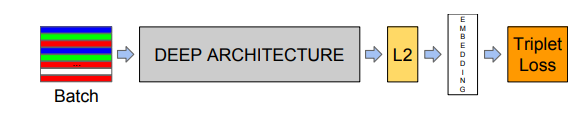
### FaceNet은 네트워크 뒤에 L2 Normalization을 거쳐 임베딩을 만들어 내고 여기에 Triplet Loss를 사용
### L2 Normalization:모델 결과물의 L2 Distance를 구한 후에 이것으로 결과물을 나눠주어 Normalization을 해주는 과정
### L2 Normalization 레이어를 거쳐나온 임베딩 벡터는 벡터의 크기가 1로 맞춰지고
### 128차원의 공간상에 반지름이 1인 구가 있다고 할 때, 구의 표면상의 한 점을 가리키는 벡터처럼 분포될 것
###  이렇게 제약조건을 주면 이후 두 점 사이의 거리를 계산할 때 두 벡터의 절대적 크기에 무관하게 두 벡터 사이의 각도에만 영향을 받게 될 것

## Triplet
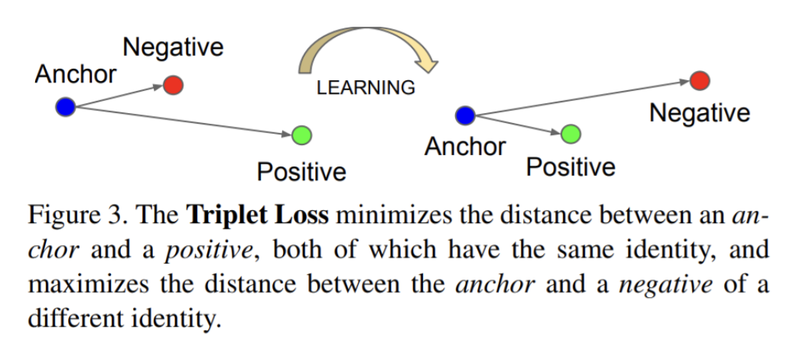
### 세 개의 데이터 쌍을 이용해 계산하는 손실함수로 네트워크를 학습시킬 수 있다.
### 임베딩 벡터 안에 보존되어야 할 정보는 A는 B에 비해 C에 더 가깝다라는 상대적인 비교수치밖에 없다 --> 중요
### A,C는 같은 사람 얼굴에서 나온 임베딩 벡터 / B는 다른 사람 얼굴에서 나온 임베딩 벡터
### Triplet Loss는 같은 사람(A,C)간의 거리는 가깝게, 다른 사람(B,C)간의 거리는 멀게 학습시키는 효과
### 🔥lib안에 있는 face_recognition 내부에는 FaceNet 얼굴 임베딩 모델이 포함되어 있다.🔥

## 7-5. 얼굴임베딩 사이 거리 측정
### 여기까지 임베딩,  Triplet Loss, 임베딩 벡터 실제로 구하기, 임베딩 공간 속에서 임베딩 벡터들의 거리가 가지는 의미
### Triplet Loss는 같은 사람의 얼굴은 임베딩 공간에서 거리를 가깝게 다른 사람의 얼굴은 멀도록 학습
### >> 학습된 모델에서는 임베딩 공간에서 서로 다른  사람이라면 임베딩 거리가 멀게 표현

### 1) 임베딩 벡터를 list -> numpy array로 변환 (128차원)
### 2) L2 Norm Distance 계산 --> numpy.linalg.norm 활용
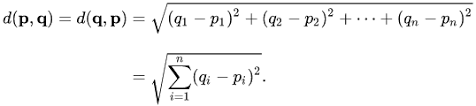

In [1]:
# L1, L2 거리 Code

import numpy as np

x = np.array([1,2,3,4,5])
y = np.array([2,3,4,5,6])

print(np.linalg.norm(y-x, ord=1))  #L1 distance
print(np.linalg.norm(y-x, ord=2))  #L2 distance

5.0
2.23606797749979


## 7-6. 얼굴임베딩 시각화
### 128차원 벡터를 다루는 건 어렵다.
### 시각화를 위해 차원 축소가 필요! (PCA, T-SNE)
### 임베딩을 시각화하기 (Tensorflow의 projector는 고차원 벡터를 차원 축소 기법을 사용해서 눈으로 확인 가능)
https://huyhoang17.github.io/128D-Facenet-LFW-Embedding-Visualisation/

* ## PCA: 주성분 분석(Pricinpal Component Analysis), 모든 차원의 축에 따른 값의 변화도인 분산(Variance)을 확인한 뒤 그 중 변화가 가장 큰 주요한 축을 남기는 방법
* ## T-SNE: 고차원 상에서 먼 거리를 저차원 상에서도 멀리 배치되도록 차원을 축소하는 방식.
### >> 먼저 랜덤하게 목표하는 차원에 데이터들을 배치
### >> 그리고 각 데이터들을 고차원 상에서의 배치와 비교를 하면서 위치를 변경해 주는 알고리즘으로 이해
### PCA에서는 모든 차원이 잘 반영되지 않는 반면 T-SNE는 Iteration을 거칠수록 가까운 벡터들이 잘 군집한 형태로 차원 축소가 되는 것

 ## 차원의 저주: 데이터가 가지고 있는 피쳐가 많음으로써 생길 수 있는 문제
 ### >> 개선: 차원 축소
 ### 1) PCA: 데이터의 변화의 폭이 가장 큰 축을 정하고, 그 다음 그와 직교하는 축을 구하여 변화가 가장 큰 주요한 축 남긴다
 ### >> 분산을 통해 필요한 축을 확인
 ### >> 1차원으로 변환하게 되면 데이터끼리 중첩되는 현상이 있는데 이는 T-SNE로 줄여줄 수 있다.
 https://bcho.tistory.com/1209?category=555440
 ### 2) T-SNE
 ### >> 기준점을 설정하고 기준점으로부터 상대점 까지 거리에 있는 T 분포의 값을 선택(친밀도)
 ### >> 친밀도가 가까운 것끼리 묶는다.
 PCA 처럼 군집이 중복되지 않는 장점은 있지만, 매번 계산할때 마다 축의 위치가 바뀌어서, 다른 모양으로 나타난다. 단 데이타의 군집성과 같은 특성들은 유지 되기 때문에 시각화를 통한 데이타 분석에는 유용하지만, 매번 값이 바뀌는 특성으로 인하여, 머신러닝 모델의 학습 피쳐로 사용하기는 다소 어려운점이 있다.
 https://bcho.tistory.com/1210